In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Opening the Image

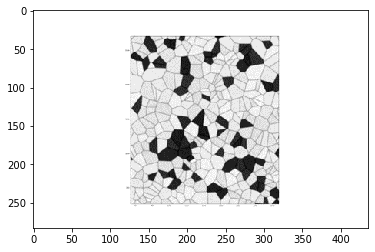

In [2]:
img_rgb = cv2.imread('deltahacks grains.png', 1)
img_gray = cv2.imread('deltahacks grains.png', 0)
plt.imshow(img_gray, 'gray')
plt.show()

## Simple Binary Threshold
#### A basic algorithm for segmenting, all values below a certain threshold value are converted to zero.

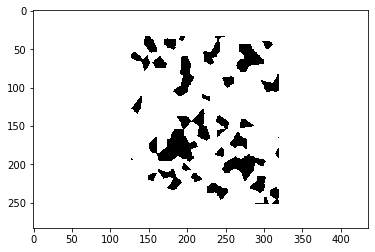

In [3]:
ret, img_thresh_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)  # Must be a grayscale image!
plt.imshow(img_thresh_bin, 'gray')
plt.show()

## Optimal Binary Threshold Value
#### Getting an optimal binary threshold can take some tinkering for different images, so Otsu's Binarization algorithm tries to find the best threshold value for binarization. Very useful when you have a tonne of images!

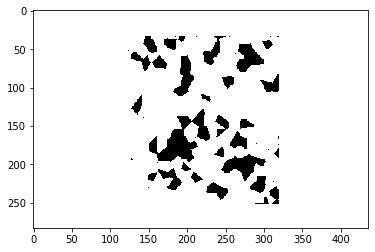

In [4]:
ret, img_thresh_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img_thresh_otsu, 'gray')
plt.show()

## Adaptive Thresholding
#### In image where shading / lighting affects the local brightness of an image, binary thresholding usually doesn't work. In that case, adaptive thesholding is an excellent alternative to try.

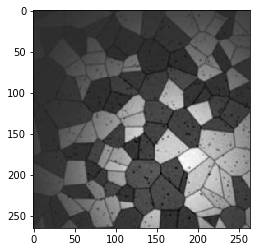

In [5]:
img_gray = cv2.imread('target 3.jpg', 0)
plt.imshow(img_gray, 'gray')
plt.show()

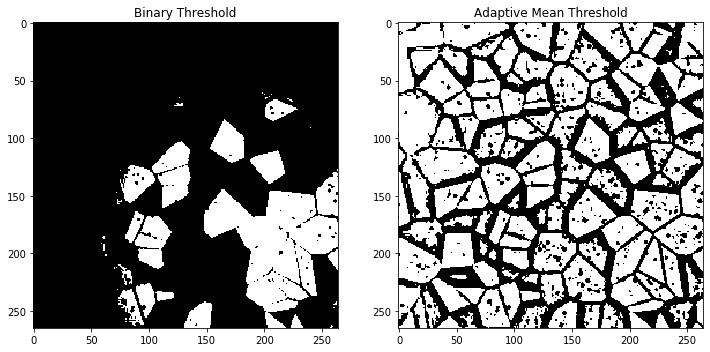

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))


# Apply binary threshold
ret, img_thresh_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ax[0].set_title("Binary Threshold")
ax[0].imshow(img_thresh_bin, 'gray')


# Apply adaptive threshold
img_thresh_adapt = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
ax[1].set_title("Adaptive Mean Threshold")
ax[1].imshow(img_thresh_adapt, 'gray')

plt.show()

## Erosion and Dilation with Kernels
#### After your image is thresholded, there are often small image fragments that are unwanted. Using a kernel, a small window that can be 3x3, 5x5, 7x7, etc. pixels large, the small fragments can be removed while maintaing the thresholded image's overall structure.

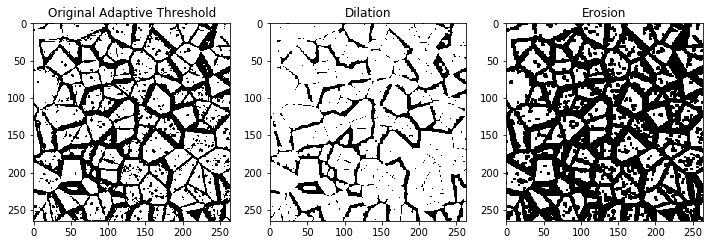

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

ax[0].imshow(img_thresh_adapt, 'gray')
ax[0].set_title("Original Adaptive Threshold")

kernel = np.ones((3,3), np.uint8)

# 'Dilate' the image
img_dilation = cv2.dilate(img_thresh_adapt, kernel, iterations=1)
ax[1].imshow(img_dilation, 'gray')
ax[1].set_title("Dilation")

# 'Erode the image'
img_erosion = cv2.erode(img_thresh_adapt, kernel, iterations=1)
ax[2].imshow(img_erosion, 'gray')
ax[2].set_title("Erosion")

plt.show()

## Opening and Closing with Kernels
##### It's often far more useful to use some combination of erosion and dilation for the best effects. 
##### Opening = erosion + dilation
##### Closing = dilation + erosion

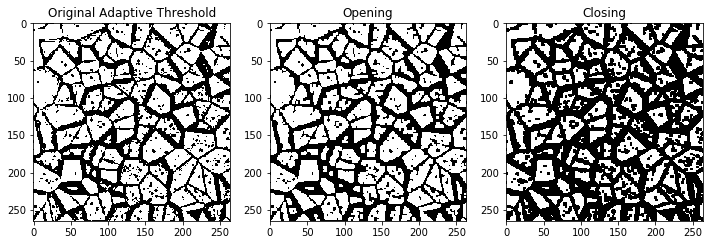

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

ax[0].imshow(img_thresh_adapt, 'gray')
ax[0].set_title("Original Adaptive Threshold")

kernel = np.ones((3,3), np.uint8)

# 'Open' the image
img_opening = cv2.morphologyEx(img_thresh_adapt, cv2.MORPH_OPEN, kernel)
ax[1].imshow(img_opening, 'gray')
ax[1].set_title('Opening')


# 'Close' the image
img_closing = cv2.morphologyEx(img_thresh_adapt, cv2.MORPH_CLOSE, kernel)
ax[2].imshow(img_erosion, 'gray')
ax[2].set_title("Closing")

plt.show()